<a href="https://colab.research.google.com/github/Shirsendu1260/ai-notebooks/blob/main/ai_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('/content/column_2C_weka.csv')
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [ ]:
# Visualization of 'Abnormal' and 'Normal' classes
normal = data[data['class'] == 'Normal']
abnormal = data[data['class'] == 'Abnormal']

In [ ]:
normal

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
abnormal

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


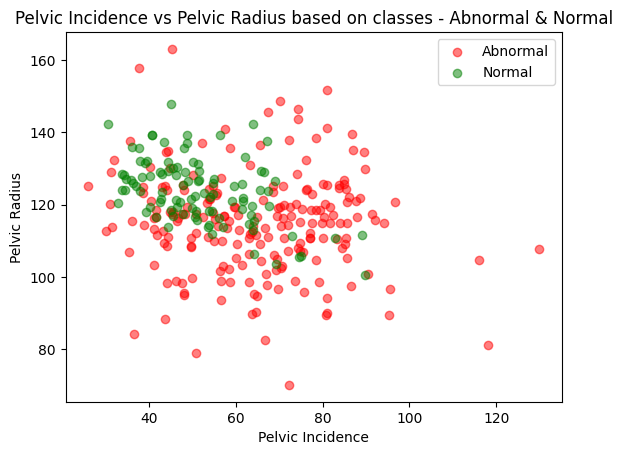

In [ ]:
plt.scatter(abnormal.pelvic_incidence, abnormal.pelvic_radius, label='Abnormal', color='r', alpha=0.5)
plt.scatter(normal.pelvic_incidence, normal.pelvic_radius, label='Normal', color='g', alpha=0.5)
plt.xlabel('Pelvic Incidence')
plt.ylabel('Pelvic Radius')
plt.title('Pelvic Incidence vs Pelvic Radius based on classes - Abnormal & Normal')
plt.legend()
plt.show()

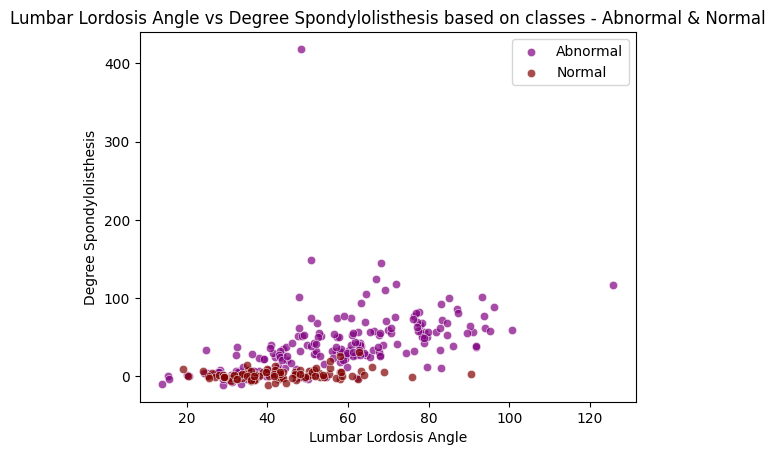

In [ ]:
sns.scatterplot(x='lumbar_lordosis_angle', y='degree_spondylolisthesis', label='Abnormal', color='purple', alpha=0.7, data=abnormal)
sns.scatterplot(x='lumbar_lordosis_angle', y='degree_spondylolisthesis', label='Normal', color='maroon', alpha=0.7, data=normal)
plt.xlabel('Lumbar Lordosis Angle')
plt.ylabel('Degree Spondylolisthesis')
plt.title('Lumbar Lordosis Angle vs Degree Spondylolisthesis based on classes - Abnormal & Normal')
plt.legend()
plt.show()

In [ ]:
# Convert 'class' target column to numeric from object type
data["class"] = [1 if i == "Normal" else 0 for i in data["class"]]
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [ ]:
# Gather the target column
y = data['class'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Gather the feature columns
x = data.drop(["class"], axis=1)
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [ ]:
# Normalization
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [ ]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=40, test_size=0.25)

K-Nearest Neighbors Classifier

In [ ]:
# Firstly we should find the best k value for the best predict rate
score_list = []

for i in range(1, 140):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  score_list.append(knn.score(x_test, y_test))

score_list

[0.782051282051282,
 0.8076923076923077,
 0.782051282051282,
 0.7948717948717948,
 0.8205128205128205,
 0.782051282051282,
 0.7692307692307693,
 0.782051282051282,
 0.8076923076923077,
 0.8205128205128205,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.7948717948717948,
 0.782051282051282,
 0.7948717948717948,
 0.8076923076923077,
 0.8205128205128205,
 0.8333333333333334,
 0.8333333333333334,
 0.8205128205128205,
 0.7948717948717948,
 0.8076923076923077,
 0.8076923076923077,
 0.8205128205128205,
 0.8205128205128205,
 0.8076923076923077,
 0.8205128205128205,
 0.8076923076923077,
 0.8461538461538461,
 0.8205128205128205,
 0.8205128205128205,
 0.8076923076923077,
 0.8205128205128205,
 0.7948717948717948,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.7948717948717948,
 0.7948717948717948,
 0.782051282051282,
 0.782051282051282,

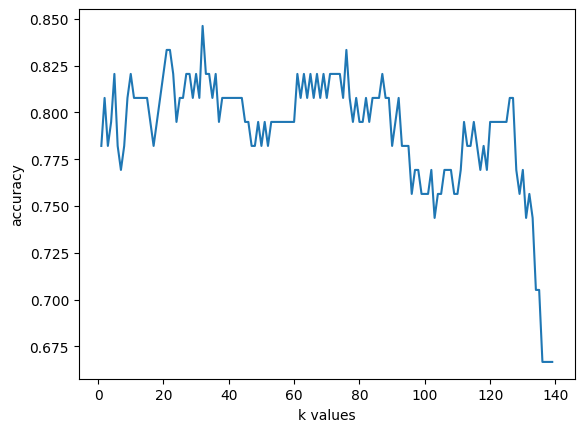

In [ ]:
plt.plot(range(1, 140), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
# As we can see, the best value of k is 32
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("For k = 32, K-NN score: ", knn.score(x_test, y_test))

For k = 32, K-NN score:  0.8461538461538461
